# Informe Final de la Prueba Técnica 1

**Autor:** Isabel Castrillón Acosta

**Fecha:** 25-06-2025

**Descripción:** Este informe presenta los resultados de la prueba técnica 1, que consistió en analizar y predecir los precios de dos equipos a partir de datos históricos mensuales de los precios de tres materias primas (X, Y, Z). Se utilizaron modelos SARIMAX para realizar las predicciones y se calcularon los costos de los equipos basados en las predicciones obtenidas.


# 1. Explicación del Caso

- Empresa de construcción necesita estimar el costo de un proyecto de 36 meses de duración (tres años).

- Se debe estimar el costo de los equipos, con base en el cosato de las materias primas que lo componen (X, Y, Z). 

**Detalles de Equipos**

- Equipo 1: $0.2 * PrecioX + 0.8 * PrecioY $

- Equipo 2: $\frac{(PrecioX + PrecioY + PrecioZ)}{3} $

**Datos**

- Todos los dataframes tienen rangos de tiempos diferentes en la columna "Fecha" y una columna de "Precio".
- Se cuentan con tres dataframes:
  - X: contiene el costo de las materias primas X.
  - Y: contiene el costo de las materias primas Y.
  - Z: contiene el costo de las materias primas Z.


**Beneficios esperados**
- Presición en la estimación de costos, lo que permitirá una mejor planificación financiera del proceso.
- Optimización de recursos al seleccionar proveedores con la mejor relación costo-beneficio. 






# 2. Supuestos

- Suponemos que las predicciones se haran a futuro, por lo que haremos predicciones de los precios de las materias primas X, Y y Z, a 3 meses, 6 meses y 12 meses, 24 meses y 36 meses. La fecha de inicio de las predicciones es el último mes del dataframe de cada materia prima. Pero la fecha que tomaremos como base para el proyecto, es el 05-2024, ya que el 04-2024 es el último mes del dataframe x, que es el que tiene el rango de tiempo más largo. 

- Los 36 meses se cuentan desde el 05-2024 hasta el 04-2027. 


# 3. Formas de resolver el caso y la opcion elegida

- Ya que cada dataframe tiene una cantidad de filas diferente y un rango de tiempo distinto, se puede hacer una regresion lineal para cada materia prima y luego hacer predicciones a futuro para las mismas fechas de las tres materias primas.
- Sin embargo, al observar los datos, se nota que no hay una tendencia lineal clara en los precios de las materias primas, lo que sugiere que un modelo de regresión lineal no sería adecuado para capturar la dinámica de los precios a lo largo del tiempo.

- Por lo tanto, se opta por un modelo SARIMAX (Seasonal Autoregressive Integrated Moving Average with eXogenous variables), que es un modelo de series temporales que puede capturar tanto la estacionalidad como las tendencias en los datos de series temporales.
- Este modelo es adecuado para datos de series temporales que presentan patrones estacionales y tendencias, lo que lo hace más robusto para las predicciones a largo plazo.


- Una vez obtenidas las predicciones, se pueden aplicar las formulas de los equipos, para calcular los costos a futuro de ambos equipos. 

# 4. Resultados del análisis de los datos y los modelos

## 4.1 Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

## 4.2 Cargar los dataframes



In [2]:
df_x = pd.read_csv('../Datos/X_cleaned.csv')
df_y = pd.read_csv('../Datos/Y_cleaned.csv')
df_z = pd.read_csv('../Datos/Z_cleaned.csv')

In [3]:
df_x.head(), df_y.head(), df_z.head()

(         Date  Price
 0  2024-04-04  89.18
 1  2024-04-03  89.35
 2  2024-04-02  88.92
 3  2024-04-01  87.42
 4  2024-03-28  87.48,
          Date   Price
 0  2023-09-12  547.33
 1  2023-09-11  546.00
 2  2023-09-08  545.00
 3  2023-09-07  550.00
 4  2023-09-06  552.50,
          Date    Price
 0  2010-01-01  2225.25
 1  2010-01-04  2225.25
 2  2010-01-05  2246.50
 3  2010-01-06  2302.50
 4  2010-01-07  2306.50)

## 4.3 Preprocesamiento de los datos

In [4]:
# Asegurar que la fecha es tipo datetime y ordenar

df_x['Date'] = pd.to_datetime(df_x['Date'])
df_x = df_x.sort_values('Date')

df_y['Date'] = pd.to_datetime(df_y['Date'])
df_y = df_y.sort_values('Date')

df_z['Date'] = pd.to_datetime(df_z['Date'])
df_z = df_z.sort_values('Date')

### 4.3.1 Resamplear los dataframes a mensual

In [5]:
df_x_1 = df_x.copy()
df_x_1.set_index('Date', inplace=True)
df_x_1 = df_x_1.resample('M').mean()
df_x_1 

C:\Users\Isabel\AppData\Local\Temp\ipykernel_8036\1460643876.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_x_1 = df_x_1.resample('M').mean()


,Price
Date,
1988-06-30,15.172500
1988-07-31,14.924286
1988-08-31,15.009091
1988-09-30,13.540909
1988-10-31,12.555238
...,...
2023-12-31,77.324000
2024-01-31,79.149545
2024-02-29,81.716190


In [6]:
df_y_1 = df_y.copy()
df_y_1.set_index('Date', inplace=True)
df_y_1 = df_y_1.resample('M').mean()
df_y_1 

C:\Users\Isabel\AppData\Local\Temp\ipykernel_8036\1648203445.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_y_1 = df_y_1.resample('M').mean()


,Price
Date,
2006-07-31,541.000000
2006-08-31,498.913043
2006-09-30,475.714286
2006-10-31,471.704545
2006-11-30,471.363636
...,...
2023-05-31,550.593913
2023-06-30,541.775909
2023-07-31,554.357619


In [7]:
df_z_1 = df_z.copy()
df_z_1.set_index('Date', inplace=True)
df_z_1 = df_z_1.resample('M').mean()
df_z_1 

C:\Users\Isabel\AppData\Local\Temp\ipykernel_8036\3670378998.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_z_1 = df_z_1.resample('M').mean()


,Price
Date,
2010-01-31,2233.892857
2010-02-28,2048.575000
2010-03-31,2204.130435
2010-04-30,2313.727273
2010-05-31,2048.666667
...,...
2023-04-30,2333.300000
2023-05-31,2271.586957
2023-06-30,2180.738636


## 4.4 Modelo SARIMAX

### 4.4.1 Modelo SARIMAX para la materia prima X


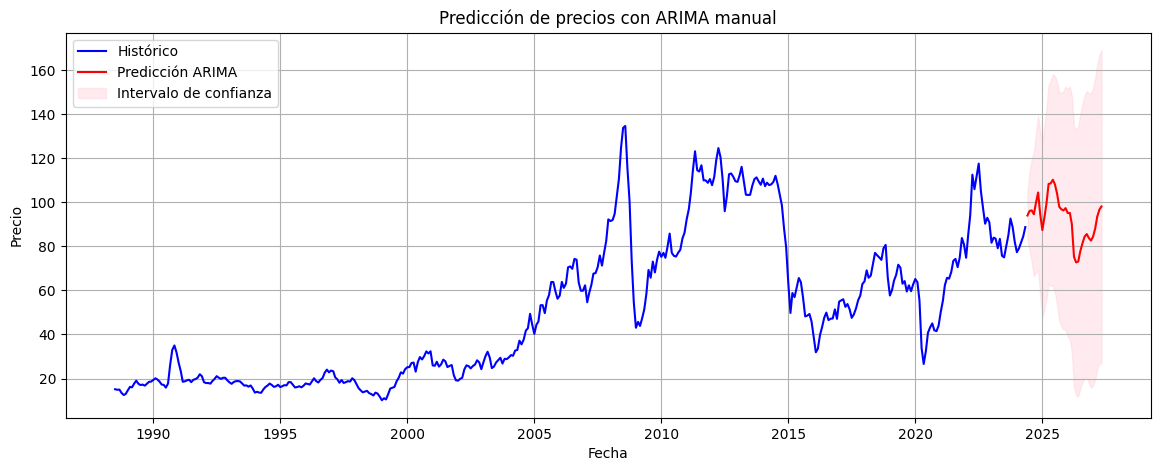

In [8]:
warnings.filterwarnings("ignore")

# p - número de términos autorregresivos
# d - número de diferencias
# q - número de términos de media móvil
# s - frecuencia estacional (en este caso, mensual)

order = (2, 1, 2)        # ARIMA(p,d,q) 
seasonal_order = (1, 1, 0, 36)  # SARIMA(P,D,Q,s) para mensual

# Crear modelo
modelo = SARIMAX(df_x_1['Price'], 
                 order=order,
                 seasonal_order=seasonal_order,
                 enforce_stationarity=False,
                 enforce_invertibility=False)

resultado = modelo.fit(disp=False)

# Predicción a futuro
steps = 36
pred_x = resultado.get_forecast(steps=steps)
pred_mean_x = pred_x.predicted_mean
conf_int_x = pred_x.conf_int()

last_date = df_x_1.index[-1]
fechas_futuras_x = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=steps, freq='M')

plt.figure(figsize=(14, 5))
plt.plot(df_x_1.index, df_x_1['Price'], label='Histórico', color='blue')
plt.plot(fechas_futuras_x, pred_mean_x, label='Predicción ARIMA', color='red')
plt.fill_between(fechas_futuras_x, conf_int_x.iloc[:, 0], conf_int_x.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de confianza')
plt.title('Predicción de precios con ARIMA manual')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()


### 4.4.2 Modelo SARIMAX para la materia prima Y

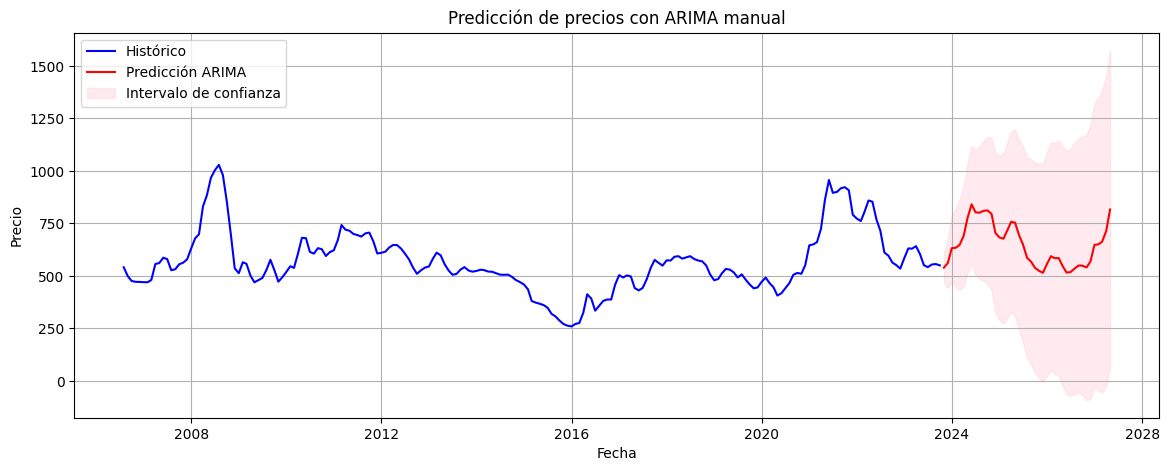

In [9]:
warnings.filterwarnings("ignore")

order = (2, 1, 2)        # ARIMA(p,d,q)
seasonal_order = (1, 1, 0, 36)  # SARIMA(P,D,Q,s) para mensual

# Ajustar modelo
modelo = SARIMAX(df_y_1['Price'], 
                 order=order,
                 seasonal_order=seasonal_order,
                 enforce_stationarity=False,
                 enforce_invertibility=False)

resultado = modelo.fit(disp=False)

# Predicción a futuro
steps = 43
pred_y = resultado.get_forecast(steps=steps)
pred_mean_y = pred_y.predicted_mean
conf_int_y = pred_y.conf_int()

# Fechas futuras
last_date = df_y_1.index[-1]
fechas_futuras_y = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=steps, freq='M')

plt.figure(figsize=(14, 5))
plt.plot(df_y_1.index, df_y_1['Price'], label='Histórico', color='blue')
plt.plot(fechas_futuras_y, pred_mean_y, label='Predicción ARIMA', color='red')
plt.fill_between(fechas_futuras_y, conf_int_y.iloc[:, 0], conf_int_y.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de confianza')
plt.title('Predicción de precios con ARIMA manual')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()


### 4.4.3 Modelo SARIMAX para la materia prima Z

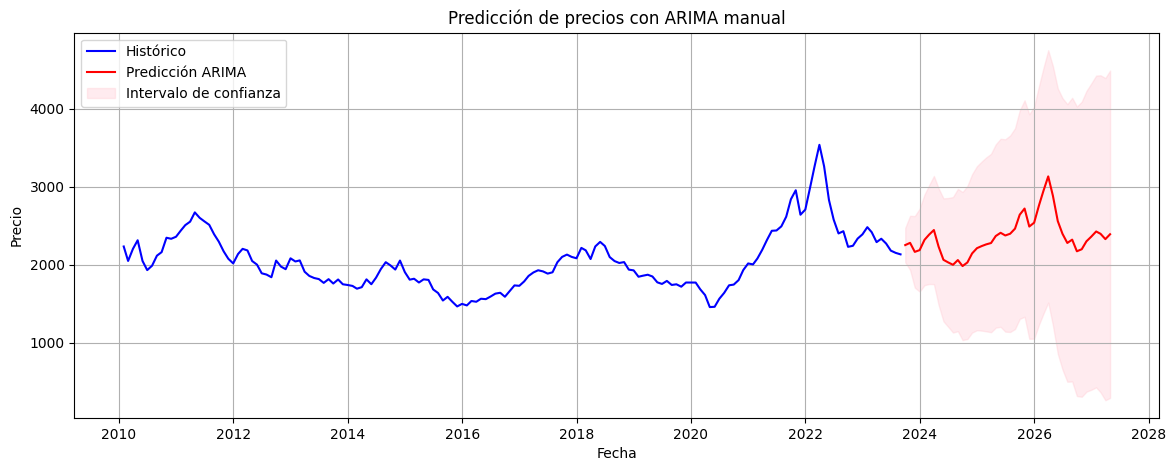

In [10]:
warnings.filterwarnings("ignore")

order = (2, 1, 2)        # ARIMA(p,d,q)
seasonal_order = (1, 1, 0, 24)  # SARIMA(P,D,Q,s) para mensual

# Ajustar modelo
modelo = SARIMAX(df_z_1['Price'], 
                 order=order,
                 seasonal_order=seasonal_order,
                 enforce_stationarity=False,
                 enforce_invertibility=False)

resultado = modelo.fit(disp=False)

# Predicción a futuro
steps = 44
pred_z = resultado.get_forecast(steps=steps)
pred_mean_z = pred_z.predicted_mean
conf_int_z = pred_z.conf_int()

# Fechas futuras
last_date = df_z_1.index[-1]
fechas_futuras_z = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=steps, freq='M')

plt.figure(figsize=(14, 5))
plt.plot(df_z_1.index, df_z_1['Price'], label='Histórico', color='blue')
plt.plot(fechas_futuras_z, pred_mean_z, label='Predicción ARIMA', color='red')
plt.fill_between(fechas_futuras_z, conf_int_z.iloc[:, 0], conf_int_z.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de confianza')
plt.title('Predicción de precios con ARIMA manual')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()


## 4.5 Poner las predicciones en un dataframe

In [ ]:
tabla_pred_x = pd.DataFrame({
    'Date': fechas_futuras_x,
    'Price X': pred_x.predicted_mean.values,
})

tabla_pred_y = pd.DataFrame({
    'Date': fechas_futuras_y,
    'Price Y': pred_y.predicted_mean.values,
})

tabla_pred_z = pd.DataFrame({
    'Date': fechas_futuras_z,
    'Price Z': pred_z.predicted_mean.values,
})


In [12]:
tabla_pred_x['Date'] = tabla_pred_x['Date'].dt.strftime('%Y-%m')
tabla_pred_y['Date'] = tabla_pred_y['Date'].dt.strftime('%Y-%m')
tabla_pred_z['Date'] = tabla_pred_z['Date'].dt.strftime('%Y-%m')

tabla_pred = pd.merge(tabla_pred_x, tabla_pred_y, on='Date', how='outer')
tabla_pred = pd.merge(tabla_pred, tabla_pred_z, on='Date', how='outer')
tabla_pred.sort_values(by='Date', inplace=True)

tabla_pred.set_index('Date', inplace=True)
tabla_pred


,Price X,Price Y,Price Z
Date,,,
2023-09,NaN,NaN,2251.899987
2023-10,NaN,539.554754,2280.484994
2023-11,NaN,560.768200,2164.916526
2023-12,NaN,632.101055,2187.376877
2024-01,NaN,634.145425,2318.903360
2024-02,NaN,647.746748,2385.022361
2024-03,NaN,690.477582,2444.919390
2024-04,NaN,776.284741,2232.099818
2024-05,93.963140,840.733228,2063.061636


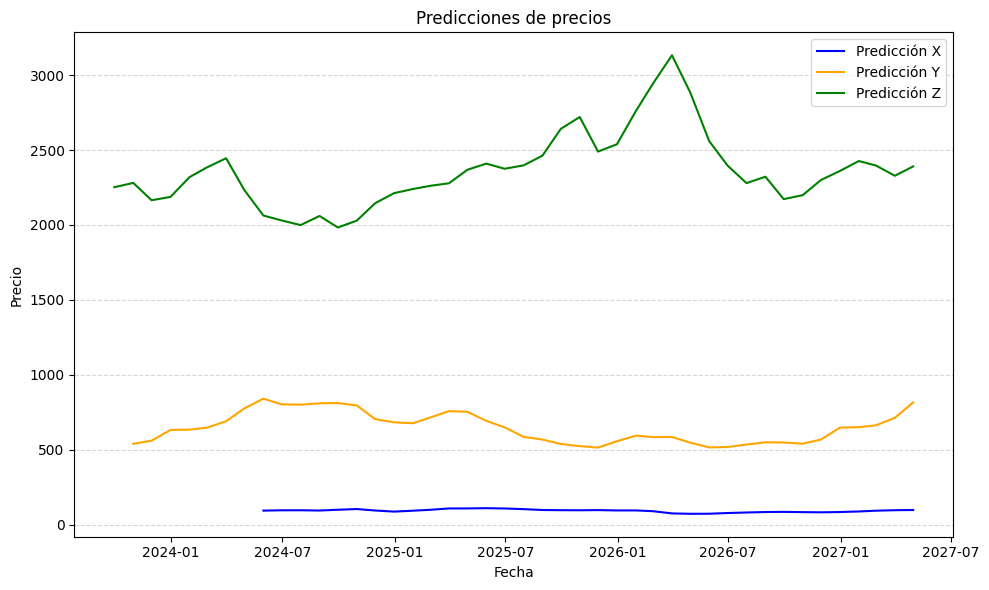

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(fechas_futuras_x, pred_mean_x, label='Predicción X', color='blue')
plt.plot(fechas_futuras_y, pred_mean_y, label='Predicción Y', color='orange')
plt.plot(fechas_futuras_z, pred_mean_z, label='Predicción Z', color='green')

plt.title('Predicciones de precios')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 4.6 Calcular los costos de los equipos

In [14]:
tabla_pred = tabla_pred.dropna()
tabla_pred.head()

,Price X,Price Y,Price Z
Date,,,
2024-05,93.963140,840.733228,2063.061636
2024-06,96.028680,802.927905,2029.934917
2024-07,96.289391,800.803737,1999.126049
2024-08,94.494577,809.953632,2059.987465
2024-09,99.697166,811.961740,1983.035285


In [15]:
# Calcular los precios de los equipos y agregarlos como nuevas columnas
tabla_pred['Equipo 1'] = 0.2 * tabla_pred['Price X'] + 0.8 * tabla_pred['Price Y']
tabla_pred['Equipo 2'] = (tabla_pred['Price X'] + tabla_pred['Price Y'] + tabla_pred['Price Z']) / 3

tabla_pred

,Price X,Price Y,Price Z,Equipo 1,Equipo 2
Date,,,,,
2024-05,93.963140,840.733228,2063.061636,691.379210,999.252668
2024-06,96.028680,802.927905,2029.934917,661.548060,976.297167
2024-07,96.289391,800.803737,1999.126049,659.900868,965.406393
2024-08,94.494577,809.953632,2059.987465,666.861821,988.145225
2024-09,99.697166,811.961740,1983.035285,669.508825,964.898064
2024-10,104.388457,795.660980,2029.076023,657.406475,976.375153
2024-11,94.602755,704.574779,2145.027275,582.580374,981.401603
2024-12,87.363015,682.976736,2212.220007,563.853992,994.186586
2025-01,93.322961,677.140996,2239.832505,560.377389,1003.432154


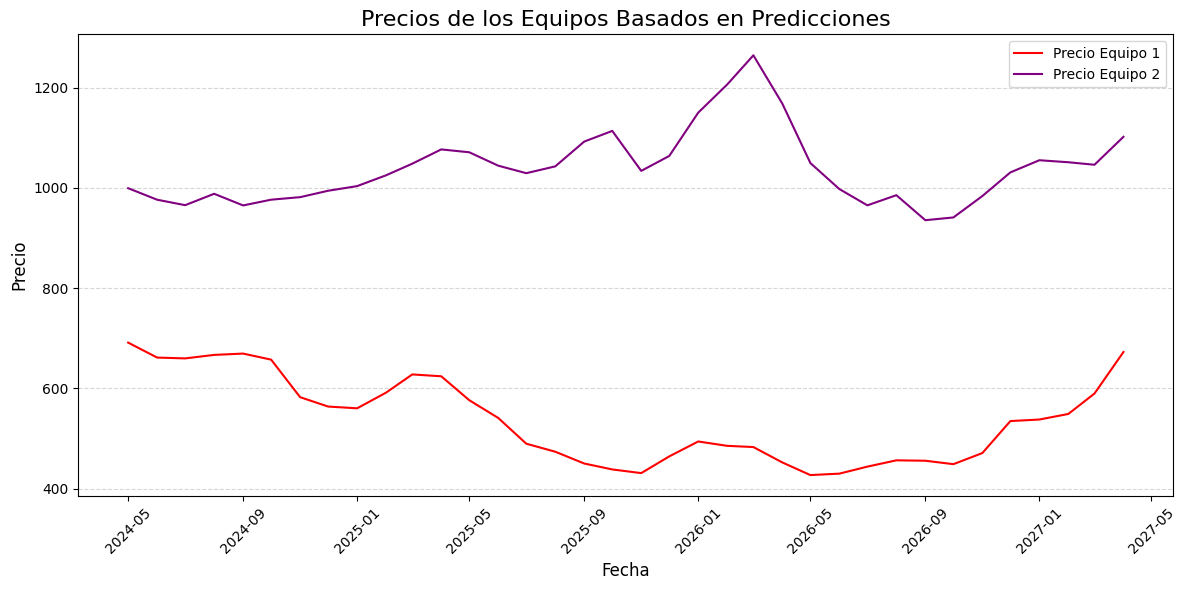

In [16]:
tabla_pred.index = pd.to_datetime(tabla_pred.index)

plt.figure(figsize=(12, 6))

plt.plot(tabla_pred.index, tabla_pred['Equipo 1'], label='Precio Equipo 1', color='red')
plt.plot(tabla_pred.index, tabla_pred['Equipo 2'], label='Precio Equipo 2', color='purple')

plt.title('Precios de los Equipos Basados en Predicciones', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 4.7 Conclusiones

- Entre mediados de 2025 y principios de 2026, ambos equipos bajan de precio. Sobre todo el Equipo 1, que alcanza su precio más bajo en octubre de 2025. 

- El mejor momento para adquirir el Equipo 2, sería mayo 2025 y septiembre 2025, ya que en esos meses el precio es el más bajo de todo el periodo analizado. Sin embargo, si el equipo se necesita antes, se puede adquirir en a mediados del 2024, ya que el precio también es relativamente bajo.

- A partir de Septiembre de 2026, ambos equipos vuelven a subir, por lo que sería estratégico adquirir equipos antes de ese periodo, para evitar un aumento de precios significativo.

- El equipo 2 tiene un precio constantemente más alto, y su curva es más volátil.

- El equipo 1 tiene un precio más estable, aunque también experimenta una subida hacia 2027.

- Con estas predicciones, es posible implementar una estrategia de compras alineada con el comportamiento futuro de precios de los equipos. Esto permite disminuir el riesgo de sobrecostos, mejorar las decisiones de abastecimiento y optimizar el uso del capital del proyecto.

# 5. Futuras mejoras

- Explorar un modelo que tome en cuenta el los datos diarios en lugar de los mensuales, para ver si se puede obtener una mejor precisión en las predicciones.


# 6. Apreciaciones y comentarios del caso (opcional)